In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy
import math
from scipy import special as sl
from scipy.stats import t
%matplotlib inline
np.set_printoptions(threshold=np.inf)

In [237]:
df_Xtrain = pd.read_csv("hw1_data_csv/Xtrain.csv",header=None)
df_Xtest = pd.read_csv("hw1_data_csv/Xtest.csv",header=None)
df_Ytrain = pd.read_csv("hw1_data_csv/Ytrain.csv",header=None)
df_Ytest = pd.read_csv("hw1_data_csv/Ytest.csv",header=None)
df_Q = pd.read_csv("hw1_data_csv/Q.csv",header=None)

In [238]:
Xtrain = np.array(df_Xtrain)
Xtest = np.array(df_Xtest)
ytrain = np.array(df_Ytrain)
ytest = np.array(df_Ytest)
Q = np.array(df_Q)

In [307]:

alpha1 = 1 + N1/2.0
alpha0 = 1 + N0/2.0
beta1 = 1 + 0.5 * np.var(Xtrain1,0) * N1 + 0.5 * N1/(1+N1) * (np.average(Xtrain1,0) ** 2)
beta0 = 1 + 0.5 * np.var(Xtrain0,0) * N0 + 0.5 * N0/(1+N0) * (np.average(Xtrain0,0) ** 2)
print "average of x 0", np.average(Xtrain0,0)
print "s of 0", np.var(Xtrain0,0)
eta1 = np.average(Xtrain1,0) * N1/(1+N1)
eta0 = np.average(Xtrain0,0) * N0/(1+N0)
lambda1 = 1.0 / (1+N1+1) * alpha1 / beta1
lambda0 = 1.0 / (1+N0+1) * alpha0 / beta0
N_test = Xtest.shape[0]
pred = np.zeros(N_test)
'''print "N1", N1
print "N0", N0
print "alpha1", alpha1
print "beta1", beta1
print "lambda1", lambda1'''
print "alpha0", alpha0
print "beta0", beta0
print "lambda0", lambda0

obs = N_test
for i in range(obs):
    x = Xtest[i,:]
    z1 = (x - eta1) * (lambda1 ** 0.5)
    z0 = (x - eta0) * (lambda0 ** 0.5)
    #print "z1", z1
    #print "z0", z0
    st1 = t.pdf(z1, 2 * alpha1)
    st0 = t.pdf(z0, 2 * alpha0)
    st1_total = np.cumprod(st1)[st1.size - 1]
    st0_total = np.cumprod(st0)[st0.size - 1]
    pystar1 = (1 + N1) / (N1+1.0+1.0)
    pystar0 = (1 + N0) / (N0+1.0+1.0)
    pred1 = st1_total * pystar1
    pred0 = st0_total * pystar0
    pred[i] = int(pred1 > pred0)
    #print "lambda1", lambda1
    #print "lambda0", lambda0
    #print "x", x
    #print "eta0", eta0
    #print "lambda0", lambda0
    #print "z0", z0
    #print "pred0", pred0
    #print "pred1", pred1
    #print pystar1
    #print pystar0
conf_mat = np.zeros((2,2), dtype = int)
for i in range(obs):
        if ytest[i] == pred[i] and ytest[i] == 0:
            conf_mat[0,0] = conf_mat[0,0] + 1
        elif ytest[i] == pred[i] and ytest[i] == 1:
            conf_mat[1,1] = conf_mat[1,1] + 1
        elif ytest[i] != pred[i] and ytest[i] == 0:
            conf_mat[0,1] = conf_mat[0,1] + 1
        else:
            conf_mat[1,0] = conf_mat[1,0] + 1
print conf_mat

average of x 0 [ 0.4455985  -0.6368184  -0.27501224  0.40989885 -0.57246175 -0.45723015
 -0.08095978  0.17310262 -0.3362725   0.05228502  0.12688421 -0.1085274
  0.05359305  0.05287704 -0.030762  ]
s of 0 [ 4.54732253  3.4309912   2.55479583  1.93133117  1.65673526  1.68219588
  1.59791309  1.4718395   0.98368962  1.19604807  1.12226742  0.78738727
  0.79565556  0.55545885  0.64098163]
alpha0 2922.0
beta0 [ 13283.82838039  10023.12803774   7463.59642087   5642.50235326
   4840.4875082    4914.79869128   4668.50741339   4300.2581727
   2874.41391072   3494.65778374   3279.15118287   2300.96410151
   2325.11132466   1623.49669993   1873.30780338]
lambda0 [  3.76397516e-05   4.98846266e-05   6.69918323e-05   8.86131664e-05
   1.03295381e-04   1.01733567e-04   1.07100612e-04   1.16272089e-04
   1.73948504e-04   1.43075526e-04   1.52478484e-04   2.17300218e-04
   2.15043467e-04   3.07977220e-04   2.66907552e-04]
[[946  36]
 [114 895]]


confusion matrix(left:ground truth, upper: predicted value): 
[[957  25]
 [146 863]]
Upper: Miss Classified Digits
Lower: The most ambiguous Digits


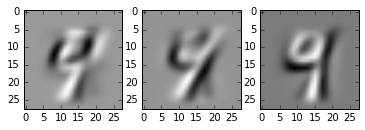

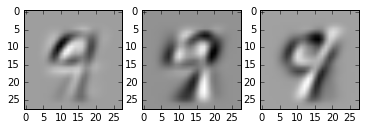

In [305]:
a = 1
b = 1
e = 1
f = 1
num_miss = 3
num_ambig = 3
mu = np.zeros(Xtrain.shape[1])
c = np.ones(Xtrain.shape[1])
hw1(Xtest, ytest,Xtrain, ytrain, mu,a, b, c, e, f, num_miss, num_ambig)

In [304]:
def hw1(Xtest,ytest, Xtrain, ytrain, mu, a, b, c, e, f, num_miss, num_ambig):
    pred = Predict(Xtest, Xtrain, ytrain, mu,a, b, c, e, f)
    tmp = computeConfMisAmbig(ytest, pred['predict'], pred['probability'], num_miss, num_ambig);
    miss = tmp['miss']
    ambig = tmp['ambig']
    conf_mat = tmp['conf']
    print 'confusion matrix(left:ground truth, upper: predicted value): '
    print conf_mat
    X_miss = np.dot(Q, Xtest[miss,:].T)
    X_ambig = np.dot(Q, Xtest[ambig,:].T)
    plotMissAndAmbig(X_miss, X_ambig);
    
def Predict(Xtest, Xtrain, ytrain, mu, a, b, c, e, f):
    obs = Xtest.shape[0]
    ytest_prob_ = np.zeros((obs, 2))
    ytest_predict_ = np.zeros(obs,dtype = int)
    params_ = {}
    params_['zero'] = getParam(0, Xtrain, ytrain, mu, a, b, c)
    params_['one']= getParam(1, Xtrain, ytrain, mu, a, b, c)
    #print "k1", params_['one']['k']
    #print "k0", params_['zero']['k']
    py_ = {}
    py_['zero'] = computeYProb(0, ytrain, e, f)
    py_['one'] = computeYProb(1, ytrain, e, f)
    
    for i in range(obs):
        px_zero_ = computeXProb(Xtest[i], params_['zero'])
        px_one_ = computeXProb(Xtest[i], params_['one'])
        ytest_prob_[i,0] = px_zero_ * py_['zero']
        ytest_prob_[i,1] = px_one_ * py_['one']
        ytest_predict_[i] = ytest_prob_[i,1] >= ytest_prob_[i,0]
        #print "px:one", px_one_
        #print "px:zero", px_zero_
        #print "py_one", py_['one']
        #print "py_zero", py_['zero']
        #print "y_test_prob0", ytest_prob_[i,0]
        #print "y_test_prob1", ytest_prob_[i,1]
        #print "pred", ytest_predict_[i]
    result = {}
    result['probability'] = ytest_prob_
    result['predict'] = ytest_predict_
    return result
def getParam(y, Xtrain, ytrain, mu, a, b, c):
    mu_n = copy.copy(mu)
    a_n = copy.copy(a)
    b_n = copy.copy(b)
    c_n = copy.copy(c)
    index = np.empty(0, dtype = int)
    obs = Xtrain.shape[0]
    for i in range(obs):
        if ytrain[i] == y:
            index = np.append(index, i)
    num_fit = index.size
    a_n = a + num_fit
    b_n = b + (num_fit / 2.0)
    #print "num_fit", num_fit
    X_sel = Xtrain[index, :]
    X_ave = np.average(X_sel, 0)
    dim = mu.size
    for j in range(dim):
        mu_n[j] = (X_ave[j] * num_fit) / (a + num_fit)
    S = np.average((X_sel - X_ave)**2, 0)
    beta1 = 1 + 0.5 * np.var(Xtrain1,0) * N1 + 0.5 * N1/(1+N1) * (np.average(Xtrain1,0) ** 2)
    #print "average of x0", X_ave
    c_n = c + num_fit * S * 0.5  + 0.5 * (num_fit * (X_ave**2)) / (a + num_fit)
    _v = 2.0 * b_n
    _k = b_n / c_n * (a_n + 1) / a_n 
    
    #print "an", a_n
    #print "bn", b_n
    #print "cn", c_n
    #print "mu", mu
    #print "k", _k
    return {'v':_v, 'k':_k, 'mu':mu_n}

def computeXProb(x, param):
    v = param['v']
    k = param['k']
    mu = param['mu']
  
    ##p = (1 + (k / v) * (x - mu)**2)**((-v/2) - 1/2) * math.exp(sl.gammaln(v/2 + 1/2) - sl.gammaln(v/2)) * (k/(scipy.pi*v))**(1/2)
    #print "v:", v
    #print "k:", k
    #print "mu", mu
    z = (x - mu) * (k ** 0.5)
    #print "x", x
    #print "mu", mu
    #print "k",k
    #print "z", z
    p = t.pdf(z, v)
    total_p = np.cumprod(p)[p.size-1]
    return total_p
def computeYProb(y, ytrain, e, f):
    num_fit = 0;
    obs = ytrain.size
    for j in range(obs):
        if ytrain[j] == y:
            num_fit = num_fit + 1
    if y == 1:
        p = float((e + num_fit)) / (num_fit + e + f)
    else:
        p = float((f + num_fit)) / (num_fit + e + f)
    return p

def computeConfMisAmbig(ytest, ypred, yprob, num_miss, num_ambig):
    conf_mat = np.zeros((2,2), dtype = int)
    miss = np.empty(0,dtype=int)
    ambig = np.empty(0,dtype=int)
    obs = ytest.size
    for i in range(obs):
        if ytest[i] == ypred[i] and ytest[i] == 0:
            conf_mat[0,0] = conf_mat[0,0] + 1
        elif ytest[i] == ypred[i] and ytest[i] == 1:
            conf_mat[1,1] = conf_mat[1,1] + 1
        elif ytest[i] != ypred[i] and ytest[i] == 0:
            conf_mat[0,1] = conf_mat[0,1] + 1
            if (miss.size < num_miss):
                miss = np.append(miss, i)
        else:
            conf_mat[1,0] = conf_mat[1,0] + 1
            if (miss.size < num_miss):
                miss = np.append(miss, i)
    for j in range(num_ambig):
        min_ind = abs((yprob[:,0] - 0.5)).argmin()
        ambig = np.append(ambig, min_ind);
        yprob[min_ind] = yprob[min_ind,0] + 1
    result = {'conf':conf_mat, 'ambig':ambig, 'miss':miss}
    return result

    
def plotMissAndAmbig(M, A):
    num_m = M.shape[1]
    num_A = A.shape[1]
    plt.figure();
    print 'Upper: Miss Classified Digits'
    for i in range(num_m):
        plt.subplot(1,num_m,i+1)
        plt.imshow(M[:,i].reshape(28,28), cmap = 'gray')
    plt.figure()
    print 'Lower: The most ambiguous Digits'
    for i in range(num_A):
        plt.subplot(1,num_A,i+1)
        plt.imshow(A[:,i].reshape(28,28), cmap ='gray')    

In [6]:
Xtrain1 = Xtrain[(ytrain==1).flatten()]
Xtrain0 = Xtrain[(ytrain == 0).flatten()]
N = Xtrain.shape[0]
N1 = np.sum(1&ytrain)
N0 = np.sum(1&~ytrain)
print N1
print N0
print Xtrain1.shape
print Xtrain0.shape

5949
5842
(5949, 15)
(5842, 15)


eta0 [ 0.44552224 -0.63670941 -0.27496518  0.4098287  -0.57236378 -0.4571519
 -0.08094593  0.17307299 -0.33621495  0.05227608  0.1268625  -0.10850883
  0.05358387  0.05286799 -0.03075673]
lambda0 [  3.76397516e-05   4.98846266e-05   6.69918323e-05   8.86131664e-05
   1.03295381e-04   1.01733567e-04   1.07100612e-04   1.16272089e-04
   1.73948504e-04   1.43075526e-04   1.52478484e-04   2.17300218e-04
   2.15043467e-04   3.07977220e-04   2.66907552e-04]
z0 [ 0.02035805 -0.00201752 -0.00209127  0.00774889 -0.00148504  0.01999259
 -0.01341175 -0.0185906   0.00206361 -0.01437973 -0.00301818 -0.02109882
  0.00423046 -0.01154722  0.0015805 ]
[[  9.81000000e+02   1.00000000e+00]
 [  1.00900000e+03   0.00000000e+00]]


In [160]:
import copy
x = np.array([1,2,3])
y = x
y[1] = 10
print x

[ 1 10  3]
